# Homogeneous Excitatory and Inhibitory Population

The goal of this notebook if to study the stability and behavior of a simple EI model. The equations describing the dynamics of the firing rates are
\begin{align}
    \tau_E \frac{d\nu_E}{dt}(t) &= -\nu_E + \left[M_{EE}\nu_E + M_{IE}\nu_I - \gamma_E \right]_{+},\\
    \tau_I \frac{d\nu_I}{dt}(t) &= -\nu_I + \left[M_{EI}\nu_E + M_{II}\nu_I - \gamma_I \right]_{+},
\end{align}
where $\left[\cdots\right]_{+}$ represents the linear threshold function (or ReLU).

In this exercise, we consider the case where $M_{EE} = 1.25$, $M_{IE} = 1$, $M_{II} = 0$, $M_{EI} = -1$, $\gamma_E=-10$ Hz and $\gamma_I=10$ Hz with $\tau_I$ still varying. It is inspired by the [(Theoretical Neuroscience, 2005)](https://boulderschool.yale.edu/sites/default/files/files/DayanAbbott.pdf) book from Peter Dayan and L.F. Abbott.

In [71]:
import numpy as np
import math as math
import tqdm as tqdm
import matplotlib.pyplot as plt
from decimal import Decimal as D # modulo operator for decimal numbers

np.random.seed(42)

# Figure properties
fig_width = 10
fig_height = 6
plt.rcParams['figure.figsize'] = [fig_width,fig_height]
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 16#9
plt.rcParams['legend.fontsize'] = 12#7.
plt.rcParams['lines.markersize'] = 5
plt.rcParams['axes.labelsize'] = 16#9
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.linewidth'] = '0.4'
plt.rcParams['font.serif'] = 'Helvetica'
MEE, MIE, MII, MEI, gammaE, gammaI, tauE, taui = 1.25, 1, -0., -1, -10, 10, 10, 20

## Nullclines

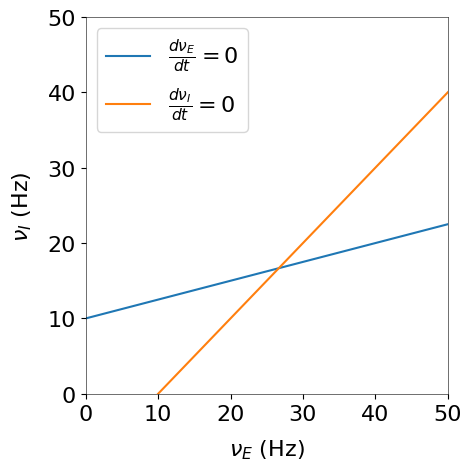

In [ ]:
# Plot the nullclines
t = np.linspace(0, 50, 50)
plt.figure(figsize=(5,5))
plt.plot(t, -((MEE - 1.)*t - gammaE)/MEI, label=r'$\frac{d\nu_E}{dt} = 0$')
plt.plot(-((MII - 1.)*t - gammaI)/MIE, t, label=r'$\frac{d\nu_I}{dt} = 0$')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.legend(fontsize=16)
plt.ylabel(r'$\nu_I$ (Hz)')
plt.xlabel(r'$\nu_E$ (Hz)')
plt.show()

## Fixed point stability and Hopf bifurcation

Plot the evolution of the firing rates for $\tau_I=30$ Hz

Text(0, 0.5, '$\\nu$ (Hz)')

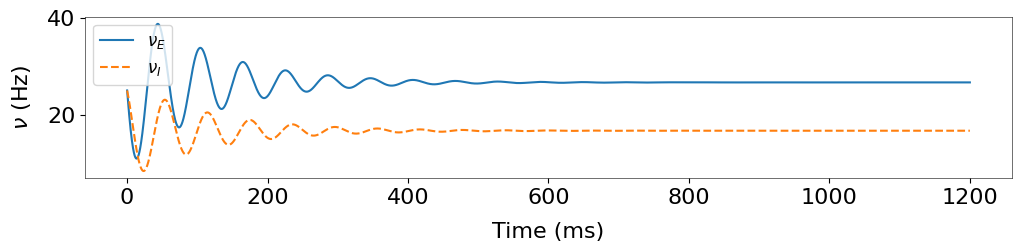

In [94]:
def fig1a(taui):
    time = np.linspace(0, 2500, 1200*100)
    dt = time[1]
    
    nu_E, nu_I = [25], [25] 
    for t in time :
        nu_E.append(nu_E[-1] + ((-nu_E[-1]/tauE)+(MEE*nu_E[-1] + MEI*nu_I[-1] - gammaE) * ((MEE*nu_E[-1] + MEI*nu_I[-1] - gammaE)>0)/tauE)*dt )
        nu_I.append(nu_I[-1] + ((-nu_I[-1]/taui)+(MIE*nu_E[-1] + MII*nu_I[-1] - gammaI) * ((MIE*nu_E[-1] + MII*nu_I[-1] - gammaI)>0)/taui)*dt )
    return np.array(nu_E), np.array(nu_I)

nu_E, nu_I = fig1a(30)
# Figure 1A
plt.figure(figsize=(10.5,2.8))
plt.plot(np.linspace(0, 1200, 1200*100+1), nu_E, label=r'$\nu_E$')
plt.plot(np.linspace(0, 1200, 1200*100+1), nu_I, linestyle='--', label=r'$\nu_I$')
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel(r'$\nu$ (Hz)')

Plot the phase-plane trajectory

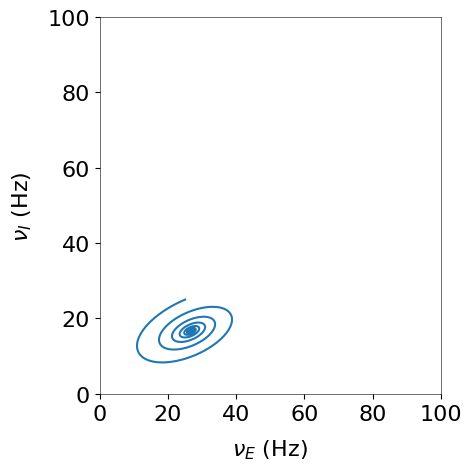

In [95]:
plt.figure(figsize=(5,5))
plt.plot(nu_E, nu_I)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.ylabel(r'$\nu_I$ (Hz)')
plt.xlabel(r'$\nu_E$ (Hz)')
plt.show()

Plot the evolution of the firing rates for $\tau_I=50$ Hz

Text(0, 0.5, '$\\nu$ (Hz)')

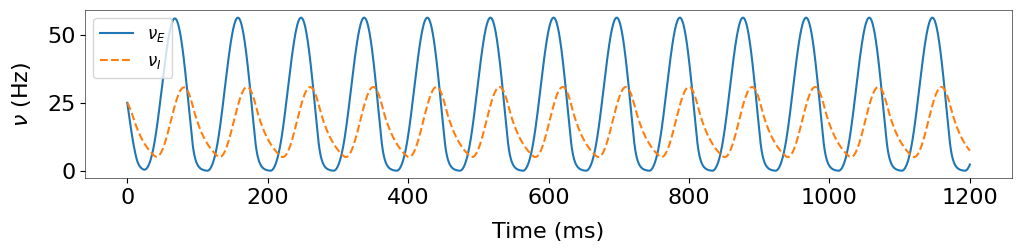

In [102]:
nu_E, nu_I = fig1a(50)
# Figure 1B
plt.figure(figsize=(10.5,2.8))
plt.plot(np.linspace(0, 1200, 1200*100+1), nu_E, label=r'$\nu_E$')
plt.plot(np.linspace(0, 1200, 1200*100+1), nu_I, linestyle='--', label=r'$\nu_I$')
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel(r'$\nu$ (Hz)')

Plot the phase-plane trajectory

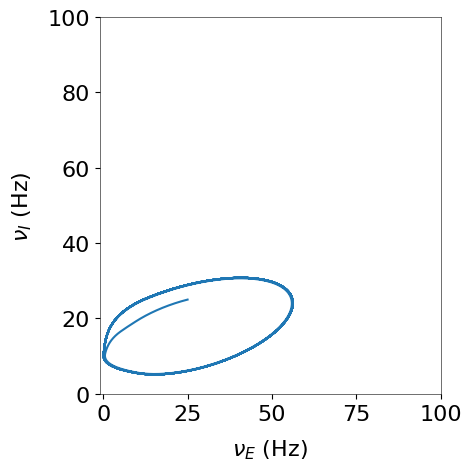

In [103]:
plt.figure(figsize=(5, 5))
plt.plot(nu_E, nu_I)
plt.xlim(-1, 100)
plt.ylim(0, 100)
plt.ylabel(r'$\nu_I$ (Hz)')
plt.xlabel(r'$\nu_E$ (Hz)')
plt.show()

Relaxation for initial conditions outside of the limit cyle

Text(0, 0.5, '$\\nu$ (Hz)')

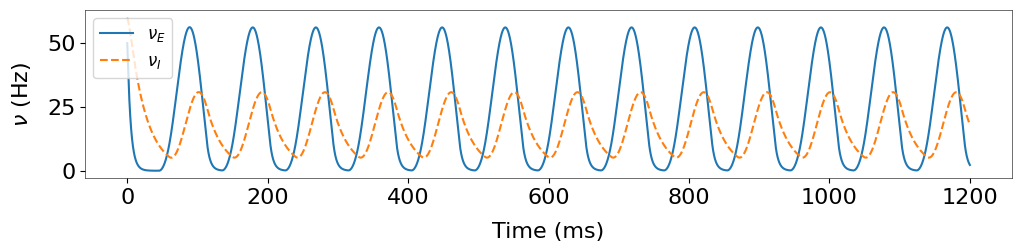

In [98]:
def fig2(taui):
    time = np.linspace(0, 2500, 1200*100)
    dt = time[1]
    
    nu_E, nu_I = [50], [60] 
    for t in time :
        nu_E.append(nu_E[-1] + ((-nu_E[-1]/tauE)+(MEE*nu_E[-1] + MEI*nu_I[-1] - gammaE) * ((MEE*nu_E[-1] + MEI*nu_I[-1] - gammaE)>0)/tauE)*dt )
        nu_I.append(nu_I[-1] + ((-nu_I[-1]/taui)+(MIE*nu_E[-1] + MII*nu_I[-1] - gammaI) * ((MIE*nu_E[-1] + MII*nu_I[-1] - gammaI)>0)/taui)*dt )
    return np.array(nu_E), np.array(nu_I)

nu_E, nu_I = fig2(50)
# Figure 2
plt.figure(figsize=(10.5,2.8))
plt.plot(np.linspace(0, 1200, 1200*100+1), nu_E, label=r'$\nu_E$')
plt.plot(np.linspace(0, 1200, 1200*100+1), nu_I, linestyle='--', label=r'$\nu_I$')
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel(r'$\nu$ (Hz)')

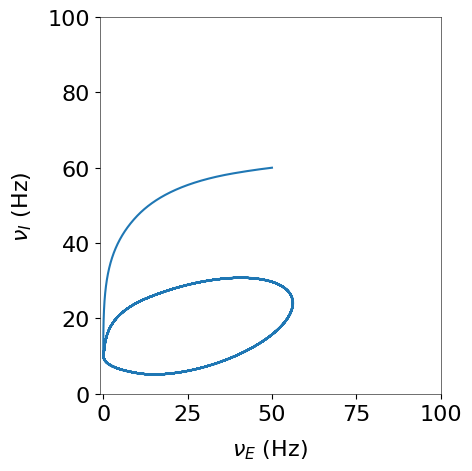

In [100]:
plt.figure(figsize=(5,5))
plt.plot(nu_E, nu_I)
plt.xlim(-1, 100)
plt.ylim(0, 100)
plt.ylabel(r'$\nu_I$ (Hz)')
plt.xlabel(r'$\nu_E$ (Hz)')
plt.show()